<a href="https://colab.research.google.com/github/aadyabansal/Minor-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

!pip install ipython-autotime

%load_ext autotime


#Preprocessing

datadir = '/content/drive/MyDrive/Vegetables'

categories = ['Cucumber', 'Tomato', 'Onion'] 
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img),plugin='matplotlib')
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)

time: 3min 39s (started: 2021-04-30 13:30:07 +00:00)


In [2]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.388058,0.451964,0.405528,0.287180,0.344534,0.340509,0.283678,0.352281,0.304492,0.240287,0.317716,0.269223,0.306604,0.384653,0.381423,0.329716,0.413954,0.372233,0.337350,0.430148,0.383864,0.405451,0.489836,0.485916,0.403276,0.495956,0.446607,0.388407,0.482884,0.420106,0.398047,0.483929,0.451395,0.396826,0.479461,0.420195,0.330839,0.414031,0.350681,0.412527,...,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,0.188235,0.200000,0.274510,Cucumber
1,0.854902,0.844144,0.913725,0.854902,0.843369,0.913725,0.854902,0.843422,0.913725,0.854902,0.846466,0.913725,0.854902,0.850980,0.913725,0.854902,0.850980,0.913725,0.858824,0.854902,0.917647,0.858824,0.854902,0.917647,0.858824,0.854902,0.917647,0.855386,0.855784,0.917647,0.854902,0.860353,0.919176,0.854902,0.862745,0.921569,0.856536,0.864379,0.921569,0.858824,...,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823529,0.890196,0.815686,0.823014,0.889681,0.815686,0.819920,0.887281,0.815686,0.818810,0.886275,0.815686,0.815686,0.886275,0.815686,0.815686,0.886275,0.815686,0.815686,0.886275,Cucumber
2,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,Cucumber
3,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,Cucumber
4,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,...,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,0.274510,0.435294,0.301961,Cucumber


time: 179 ms (started: 2021-04-30 13:33:47 +00:00)


In [3]:
# Splitting data into Training and Testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=42)

time: 255 ms (started: 2021-04-30 13:33:47 +00:00)


In [7]:
#Creating the model using SVC

from sklearn import svm
from sklearn.model_selection import GridSearchCV

#Hyperparameter Tuning using GridSearchCV

svc=svm.SVC(probability=True)
param = {
    'kernel':['linear','poly','rbf',],
    'C':[0.1,1,10,100,1000]
       
}

model = GridSearchCV(svc,param,cv= 3,n_jobs=)
model.fit(x_train,y_train)
model.best_params_

{'C': 10, 'kernel': 'rbf'}

time: 9min 15s (started: 2021-04-30 13:41:15 +00:00)


In [8]:
y_pred=model.predict(x_test)

#Predicted Output
y_pred

array(['Tomato', 'Cucumber', 'Cucumber', 'Onion', 'Cucumber', 'Tomato',
       'Onion', 'Cucumber', 'Onion', 'Tomato', 'Tomato', 'Cucumber',
       'Onion', 'Onion', 'Onion', 'Onion', 'Cucumber', 'Tomato', 'Onion',
       'Cucumber', 'Cucumber', 'Onion', 'Cucumber', 'Tomato', 'Onion',
       'Tomato', 'Onion', 'Tomato', 'Tomato', 'Onion', 'Cucumber',
       'Cucumber', 'Cucumber', 'Onion', 'Tomato', 'Cucumber', 'Cucumber',
       'Cucumber', 'Tomato', 'Tomato', 'Onion', 'Onion', 'Cucumber',
       'Tomato', 'Cucumber', 'Tomato', 'Cucumber', 'Cucumber', 'Cucumber',
       'Cucumber', 'Tomato', 'Tomato', 'Onion', 'Tomato', 'Tomato',
       'Onion', 'Cucumber', 'Cucumber', 'Tomato', 'Cucumber', 'Tomato',
       'Onion', 'Cucumber', 'Cucumber', 'Onion', 'Tomato', 'Onion',
       'Tomato', 'Tomato', 'Cucumber', 'Cucumber', 'Onion', 'Onion',
       'Onion', 'Tomato', 'Tomato', 'Cucumber', 'Cucumber', 'Tomato',
       'Cucumber', 'Cucumber', 'Onion', 'Cucumber', 'Cucumber',
       'Cucumber',

time: 2.92 s (started: 2021-04-30 13:50:30 +00:00)


In [9]:
#Real Output
y_test

array(['Tomato', 'Cucumber', 'Cucumber', 'Onion', 'Cucumber', 'Onion',
       'Cucumber', 'Cucumber', 'Onion', 'Tomato', 'Tomato', 'Cucumber',
       'Onion', 'Cucumber', 'Onion', 'Onion', 'Cucumber', 'Tomato',
       'Onion', 'Cucumber', 'Cucumber', 'Tomato', 'Cucumber', 'Tomato',
       'Onion', 'Tomato', 'Onion', 'Tomato', 'Tomato', 'Onion',
       'Cucumber', 'Cucumber', 'Cucumber', 'Onion', 'Tomato', 'Cucumber',
       'Cucumber', 'Cucumber', 'Tomato', 'Tomato', 'Onion', 'Onion',
       'Cucumber', 'Tomato', 'Cucumber', 'Tomato', 'Cucumber', 'Cucumber',
       'Cucumber', 'Cucumber', 'Tomato', 'Tomato', 'Onion', 'Tomato',
       'Tomato', 'Onion', 'Cucumber', 'Cucumber', 'Tomato', 'Cucumber',
       'Tomato', 'Onion', 'Cucumber', 'Cucumber', 'Onion', 'Cucumber',
       'Onion', 'Tomato', 'Tomato', 'Cucumber', 'Cucumber', 'Tomato',
       'Onion', 'Onion', 'Onion', 'Tomato', 'Cucumber', 'Cucumber',
       'Onion', 'Cucumber', 'Cucumber', 'Onion', 'Cucumber', 'Cucumber',
       'Cuc

time: 4.62 ms (started: 2021-04-30 13:50:33 +00:00)


In [10]:
#Evaluation of Model
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)

0.9203539823008849

time: 9.38 ms (started: 2021-04-30 13:50:33 +00:00)


In [11]:
confusion_matrix(y_pred,y_test)

array([[39,  0,  0],
       [ 2, 33,  2],
       [ 1,  4, 32]])

time: 12.2 ms (started: 2021-04-30 13:50:33 +00:00)


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Cucumber       1.00      0.93      0.96        42
       Onion       0.89      0.89      0.89        37
      Tomato       0.86      0.94      0.90        34

    accuracy                           0.92       113
   macro avg       0.92      0.92      0.92       113
weighted avg       0.92      0.92      0.92       113

time: 13.4 ms (started: 2021-04-30 13:50:33 +00:00)


In [13]:
# Saving the Model
import pickle
pickle.dump(model,open('classification_img_model.p','wb'))

time: 147 ms (started: 2021-04-30 13:50:33 +00:00)


Enter URL of the picturehttps://img.freepik.com/free-photo/green-cucumbers-isolated_88281-3921.jpg?size=626&ext=jpg
(341, 626, 3)
Predicted Output:  ['Cucumber']


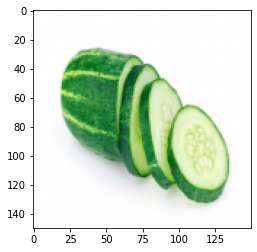

time: 4.35 s (started: 2021-04-30 13:56:44 +00:00)


In [17]:
#Testing for a new image

flat_data = []
url=input('Enter URL of the picture')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
print(f'Predicted Output:  {y_out}')

In [18]:
!python --version
import sklearn
sklearn.__version__

Python 3.7.10


'0.22.2.post1'

time: 150 ms (started: 2021-04-30 13:57:35 +00:00)
